# Predictive Analysis on Trending YouTube Videos using Machine Learning

- understanding user engagement patterns and sentiment trends on the platform
- predicting how long popular YouTube videos will remain popular.
- video’s potential to go viral.

**Models Used:**
1. Logistic Regression
2. K-Nearest Neighbors
3. Naive Bayes Classifier model
4. Lasso Regression model
5. ElasticNet Regression

#### To predict whether the ratings for a particular trending YouTube video are enabled or disabled
#### To predict whether the comments for a particular trending YouTube video are enabled or disabled

## DATA ANALYSIS

###  Importing the libraries 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc,f1_score

In [2]:
# Load the dataset
data = pd.read_csv("IN_youtube_trending_data.csv")

In [3]:
# Check the shape of the data
print("Shape of the data:", data.shape)

Shape of the data: (240486, 16)


In [4]:
# Check the type of data
print("Type of data:", type(data))

Type of data: <class 'pandas.core.frame.DataFrame'>


In [5]:
# Display the first few rows of the data
print("\nFirst few rows of the data:")
print(data.head())


First few rows of the data:
      video_id                                              title  \
0  Iot0eF6EoNA  Sadak 2 | Official Trailer | Sanjay | Pooja | ...   
1  x-KbnJ9fvJc  Kya Baat Aa : Karan Aujla (Official Video) Tan...   
2  KX06ksuS6Xo  Diljit Dosanjh: CLASH (Official) Music Video |...   
3  UsMRgnTcchY  Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...   
4  WNSEXJJhKTU  Baarish (Official Video) Payal Dev,Stebin Ben ...   

            publishedAt                 channelId    channelTitle  categoryId  \
0  2020-08-12T04:31:41Z  UCGqvJPRcv7aVFun-eTsatcA    FoxStarHindi          24   
1  2020-08-11T09:00:11Z  UCm9SZAl03Rev9sFwloCdz1g  Rehaan Records          10   
2  2020-08-11T07:30:02Z  UCZRdNleCgW-BGUJf-bbjzQg  Diljit Dosanjh          10   
3  2020-08-10T05:30:49Z  UCq-Fj5jknLsUf-MWSy4_brA        T-Series          10   
4  2020-08-11T05:30:13Z  UCye6Oz0mg46S362LwARGVcA   VYRLOriginals          10   

          trending_date                                              

In [6]:
# Display the last few rows of the data
print("\nLast few rows of the data:")
print(data.tail())


Last few rows of the data:
           video_id                                              title  \
240481  kQ058KRVVr4  EAGLE - పద్దతైన దాడి | Ravi Teja | Anupama | K...   
240482  rnfVNYvef5g  Disclaimer: Not your regular interview| Shark ...   
240483  3q6-_eROVDA  Wheel chips-ம், Manikandan tips-ம் 🤙🏻🥳| Ft. Ma...   
240484  RfXN-Ray9lo  ಮಾರಿಗೋಲ್ಡ್ - Marigold - Official Teaser Kannad...   
240485  Bh60dU0Phd8  LADDU | 1000 MOTICHOOR LADDU | Sweet and Soft ...   

                 publishedAt                 channelId  \
240481  2024-02-07T10:35:01Z  UCrzx3ZPXEZpzEGLF1gIuORQ   
240482  2024-02-08T08:30:11Z  UCkJZQddO3XTCdcLjN019FjA   
240483  2024-02-07T12:30:09Z  UCJcCB-QYPIBcbKcBQOTwhiA   
240484  2024-02-06T09:05:03Z  UCqgts67ZwDd-gAasDQbZrnQ   
240485  2024-02-05T13:37:20Z  UCk3JZr7eS3pg5AGEvBdEvFg   

                   channelTitle  categoryId         trending_date  \
240481     People Media Factory          24  2024-02-11T00:00:00Z   
240482                PINKVILLA         

In [7]:
# Display a random sample of the data
print("\nRandom sample of the data:")
print(data.sample())


Random sample of the data:
           video_id                                              title  \
203327  tRG_a3W4kG8  Pen Parkum Function 😍Most Awaited Day🙈|| Kanma...   

                 publishedAt                 channelId  \
203327  2023-07-13T14:44:51Z  UC-jxPglhH5SGYlvRRanE_LA   

                       channelTitle  categoryId         trending_date  \
203327  Kanmani - Tamil Beauty Tips          26  2023-07-15T00:00:00Z   

                                                     tags  view_count  likes  \
203327  kanmani beauty tips|kanmani tamil beuty tips|d...      295807  12616   

        dislikes  comment_count  \
203327         0            785   

                                        thumbnail_link  comments_disabled  \
203327  https://i.ytimg.com/vi/tRG_a3W4kG8/default.jpg              False   

        ratings_disabled                                        description  
203327             False  Hii friends,Hope all doing good, Today's video...  


In [8]:
# Check information about the data
print("\nInformation about the data:")
print(data.info())


Information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240486 entries, 0 to 240485
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           240486 non-null  object
 1   title              240486 non-null  object
 2   publishedAt        240486 non-null  object
 3   channelId          240486 non-null  object
 4   channelTitle       240485 non-null  object
 5   categoryId         240486 non-null  int64 
 6   trending_date      240486 non-null  object
 7   tags               240486 non-null  object
 8   view_count         240486 non-null  int64 
 9   likes              240486 non-null  int64 
 10  dislikes           240486 non-null  int64 
 11  comment_count      240486 non-null  int64 
 12  thumbnail_link     240486 non-null  object
 13  comments_disabled  240486 non-null  bool  
 14  ratings_disabled   240486 non-null  bool  
 15  description        221425 non-null  obj

In [9]:
# Generate descriptive statistics of the data
print("\nDescriptive statistics of the data:")
print(data.describe())


Descriptive statistics of the data:
          categoryId    view_count         likes      dislikes  comment_count
count  240486.000000  2.404860e+05  2.404860e+05  2.404860e+05   2.404860e+05
mean       20.850619  2.831056e+06  1.420290e+05  2.437945e+03   8.451961e+03
std         6.049196  7.031413e+06  4.003004e+05  7.359516e+04   7.174554e+04
min         1.000000  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00
25%        20.000000  3.863395e+05  1.251825e+04  0.000000e+00   3.510000e+02
50%        24.000000  9.637545e+05  3.815050e+04  0.000000e+00   1.149000e+03
75%        24.000000  2.458999e+06  1.188938e+05  8.050000e+02   4.033000e+03
max        29.000000  2.644074e+08  1.611524e+07  1.234147e+07   6.738565e+06


In [10]:
# Check if there are any missing values in the data
print("\nCheck for missing values in the data:")
print(data.isnull().any())


Check for missing values in the data:
video_id             False
title                False
publishedAt          False
channelId            False
channelTitle          True
categoryId           False
trending_date        False
tags                 False
view_count           False
likes                False
dislikes             False
comment_count        False
thumbnail_link       False
comments_disabled    False
ratings_disabled     False
description           True
dtype: bool


In [11]:
# Count the number of missing values in each column
print("\nNumber of missing values in each column:")
print(data.isnull().sum())


Number of missing values in each column:
video_id                 0
title                    0
publishedAt              0
channelId                0
channelTitle             1
categoryId               0
trending_date            0
tags                     0
view_count               0
likes                    0
dislikes                 0
comment_count            0
thumbnail_link           0
comments_disabled        0
ratings_disabled         0
description          19061
dtype: int64


## Data Pre-processing 

#### Drop the "description" column

In [12]:
# Drop the "description" column
data = data.dropna(axis=1)

# Display the shape of the data after dropping the column
print("Shape of the data after dropping 'description' column:", data.shape)


Shape of the data after dropping 'description' column: (240486, 14)


#### Convert boolean values to numerical values in columns 13, 14

In [13]:
# Convert boolean values to numerical values in columns 13 and 14 and cast to int64
data['comments_disabled'] = data['comments_disabled'].astype('int64')
data['ratings_disabled'] = data['ratings_disabled'].astype('int64')

# Display the first few rows of the data after conversion
print("\nFirst few rows of the data after conversion:")
print(data.head())


First few rows of the data after conversion:
      video_id                                              title  \
0  Iot0eF6EoNA  Sadak 2 | Official Trailer | Sanjay | Pooja | ...   
1  x-KbnJ9fvJc  Kya Baat Aa : Karan Aujla (Official Video) Tan...   
2  KX06ksuS6Xo  Diljit Dosanjh: CLASH (Official) Music Video |...   
3  UsMRgnTcchY  Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...   
4  WNSEXJJhKTU  Baarish (Official Video) Payal Dev,Stebin Ben ...   

            publishedAt                 channelId  categoryId  \
0  2020-08-12T04:31:41Z  UCGqvJPRcv7aVFun-eTsatcA          24   
1  2020-08-11T09:00:11Z  UCm9SZAl03Rev9sFwloCdz1g          10   
2  2020-08-11T07:30:02Z  UCZRdNleCgW-BGUJf-bbjzQg          10   
3  2020-08-10T05:30:49Z  UCq-Fj5jknLsUf-MWSy4_brA          10   
4  2020-08-11T05:30:13Z  UCye6Oz0mg46S362LwARGVcA          10   

          trending_date                                               tags  \
0  2020-08-12T00:00:00Z  sadak|sadak 2|mahesh bhatt|vishesh films|pooj

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240486 entries, 0 to 240485
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           240486 non-null  object
 1   title              240486 non-null  object
 2   publishedAt        240486 non-null  object
 3   channelId          240486 non-null  object
 4   categoryId         240486 non-null  int64 
 5   trending_date      240486 non-null  object
 6   tags               240486 non-null  object
 7   view_count         240486 non-null  int64 
 8   likes              240486 non-null  int64 
 9   dislikes           240486 non-null  int64 
 10  comment_count      240486 non-null  int64 
 11  thumbnail_link     240486 non-null  object
 12  comments_disabled  240486 non-null  int64 
 13  ratings_disabled   240486 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 25.7+ MB


In [15]:
df = data

# PREDICTION USING RATINGS

### Splitting the dataset into 80% training and 20% testing

In [16]:
# Define X (features) and y (target variable)
X = data.drop(columns=['video_id', 'title', 'publishedAt', 'channelId', 'trending_date', 'tags', 'thumbnail_link'])
y = data['ratings_disabled']  # Assuming 'ratings_disabled' is the column you want to predict

In [17]:
# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Printing the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (192388, 7)
X_test shape: (48098, 7)
Y_train shape: (192388,)
Y_test shape: (48098,)


## 1. logistic regression model

**Performance Metrics:**
    
Accuracy: Measures the proportion of correctly classified instances.

Precision: Measures the proportion of true positive predictions among all positive predictions.

Recall: Measures the proportion of true positive predictions among all actual positives.

F1 Score: Harmonic mean of precision and recall, balancing between precision and recall.

Area Under the Receiver Operating Characteristic Curve (AUC-ROC): Measures the ability of the model to distinguish between the positive and negative classes.

Plots:

Confusion Matrix: Visualizes the model's performance by showing true positive, true negative, false positive, and false negative predictions.

ROC Curve: Plots the true positive rate against the false positive rate, showing the trade-off between sensitivity and specificity.

Accuracy: 0.9967774127822363
AUC Score: 0.9123355567226793


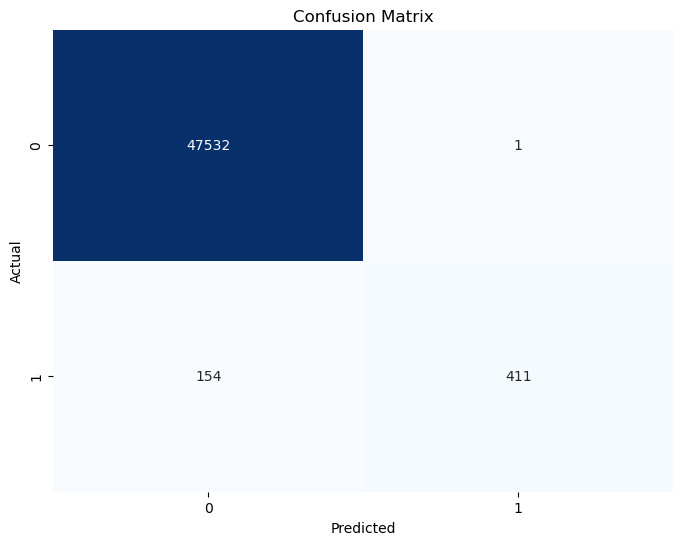

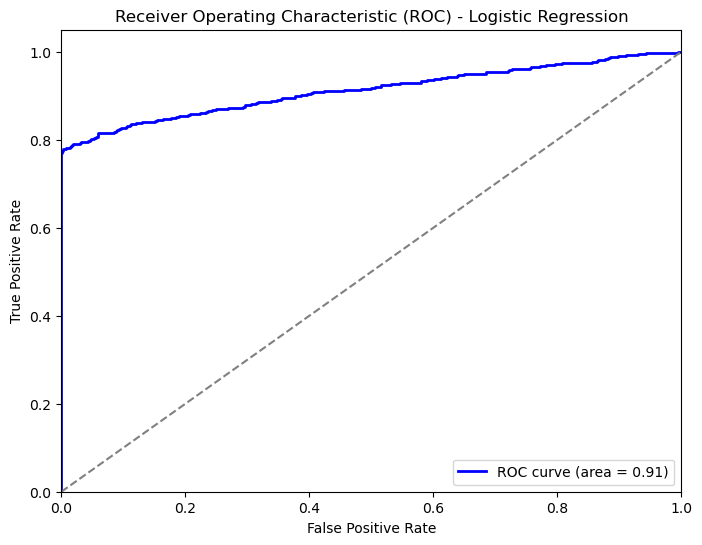

In [19]:
# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg_model.predict(X_test)
y_prob = logreg_model.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = auc(fpr, tpr)
print("AUC Score:", auc_score)

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

## 2. K-Nearest Neighbors model

Accuracy: 0.9924944904154019
AUC Score: 0.8616063288308877


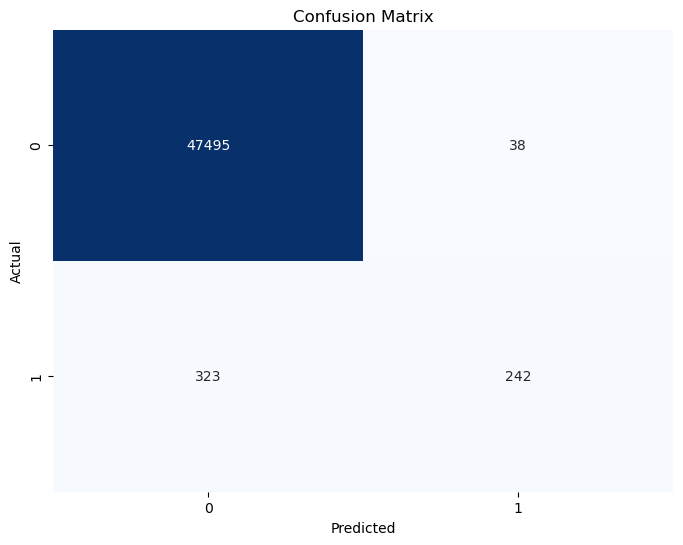

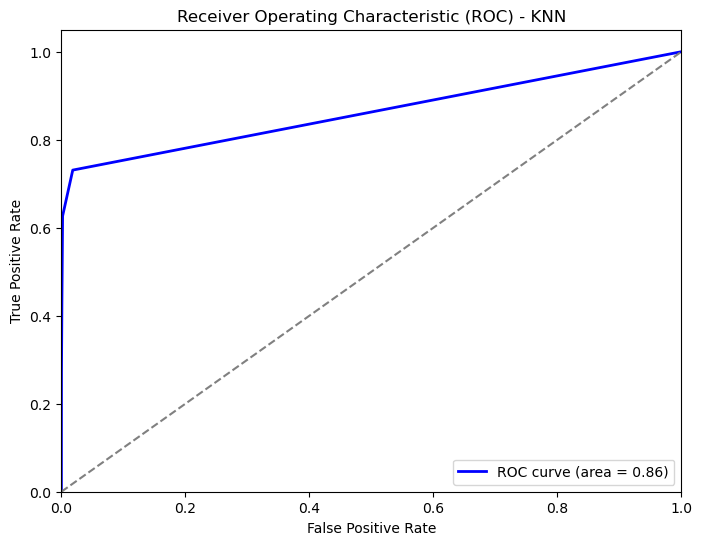

In [20]:
# Initialize and train the K-Nearest Neighbors model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_model.predict(X_test)
y_prob = knn_model.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = auc(fpr, tpr)
print("AUC Score:", auc_score)

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - KNN')
plt.legend(loc="lower right")
plt.show()


## 3. Naive Bayes Classifier model

Accuracy: 0.9879620774252568
AUC Score: 0.6886835396517259


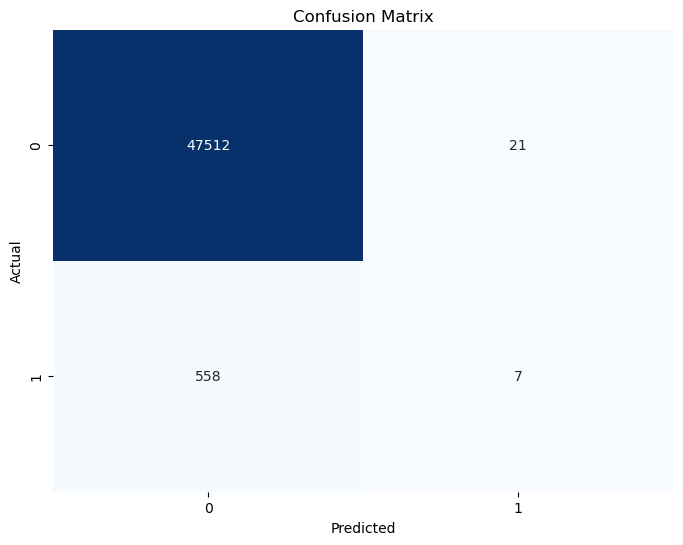

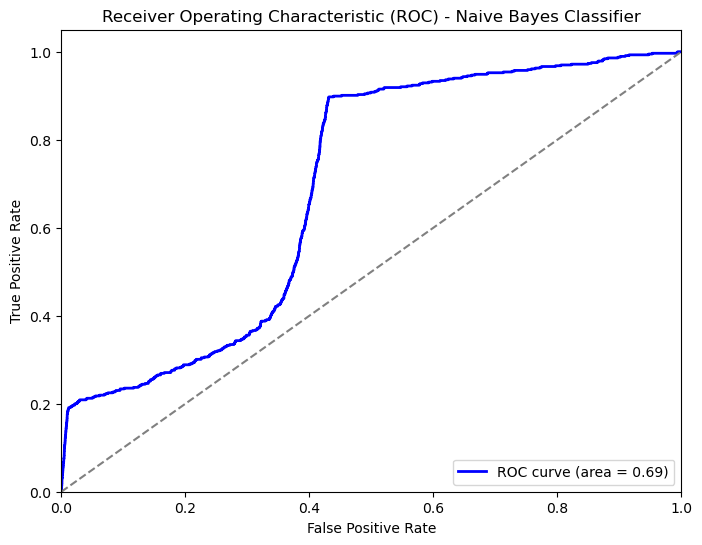

In [21]:
# Initialize and train the Naive Bayes Classifier model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = nb_model.predict(X_test)
y_prob = nb_model.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = auc(fpr, tpr)
print("AUC Score:", auc_score)

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Naive Bayes Classifier')
plt.legend(loc="lower right")
plt.show()


### Best Model

Based on the provided accuracy and AUC score for each model, the **Logistic Regression model** has the highest accuracy (0.9968) and AUC score (0.9123). Therefore, the Logistic Regression model appears to be the best-performing model among the three options.

## 4. Lasso Regression model

**Performance Metrics:**
    
Mean Squared Error (MSE): Measures the average squared difference between the actual and predicted values.
    
Root Mean Squared Error (RMSE): Square root of MSE, providing error in the same units as the target variable.
    
R-squared (R²) Score: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.
    
Plots:
    
Actual vs. Predicted Values: Visualizes the relationship between the actual and predicted values.


Mean Squared Error (MSE): 0.01155740068308015
Root Mean Squared Error (RMSE): 0.10750535188110474
R-squared (R²) Score: 0.00443290737671953


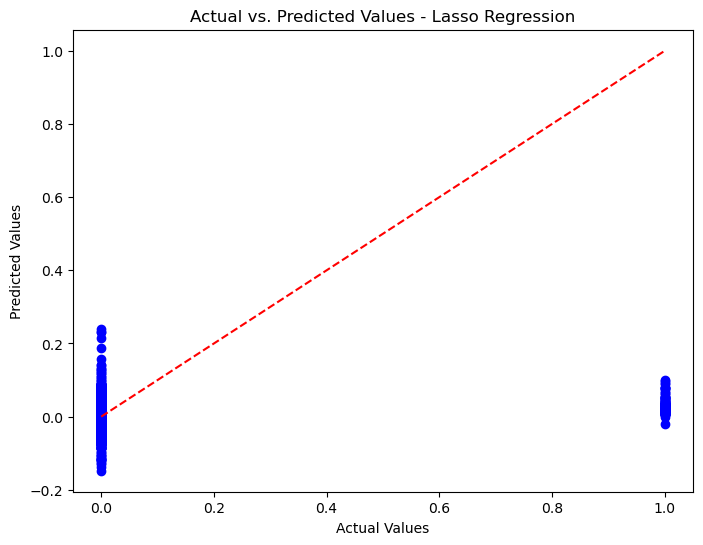

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Lasso Regression model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lasso_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_lasso = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse_lasso)

# Calculate Root Mean Squared Error (RMSE)
rmse_lasso = np.sqrt(mse_lasso)
print("Root Mean Squared Error (RMSE):", rmse_lasso)

# Calculate R-squared (R²) Score
r2_lasso = r2_score(y_test, y_pred)
print("R-squared (R²) Score:", r2_lasso)

# Plot Actual vs. Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - Lasso Regression')
plt.show()


## 5. ElasticNet Regression

Mean Squared Error (MSE): 0.011557421127647292
Root Mean Squared Error (RMSE): 0.10750544696733878
R-squared (R²) Score: 0.004431146259420982


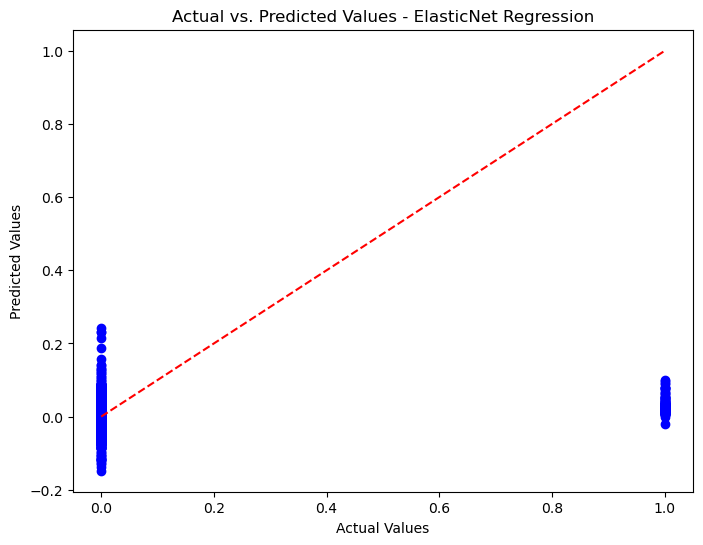

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the ElasticNet Regression model
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = elasticnet_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_elasticnet = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse_elasticnet)

# Calculate Root Mean Squared Error (RMSE)
rmse_elasticnet = np.sqrt(mse_elasticnet)
print("Root Mean Squared Error (RMSE):", rmse_elasticnet)

# Calculate R-squared (R²) Score
r2_elasticnet = r2_score(y_test, y_pred)
print("R-squared (R²) Score:", r2_elasticnet)

# Plot Actual vs. Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - ElasticNet Regression')
plt.show()


### Select the Best Model

In [24]:
# Assuming MSE, RMSE, and R-squared scores are stored in variables mse_lasso, rmse_lasso, r2_lasso, mse_elasticnet, rmse_elasticnet, r2_elasticnet

# Select the best model based on provided metrics
if mse_lasso < mse_elasticnet:
    best_model = "Lasso Regression"
elif mse_lasso > mse_elasticnet:
    best_model = "ElasticNet Regression"
else:  # If both MSE are equal, compare RMSE
    if rmse_lasso < rmse_elasticnet:
        best_model = "Lasso Regression"
    elif rmse_lasso > rmse_elasticnet:
        best_model = "ElasticNet Regression"
    else:  # If both RMSE are equal, compare R-squared
        if r2_lasso > r2_elasticnet:
            best_model = "Lasso Regression"
        elif r2_lasso < r2_elasticnet:
            best_model = "ElasticNet Regression"
        else:  # If all metrics are equal, select either model
            best_model = "Both models have identical performance"

print("Best Model:", best_model)


Best Model: Lasso Regression


Best Model: **Lasso Regression**

### To predict whether the ratings for a particular trending YouTube video are enabled or disabled Using Logistic Regression Model

In [25]:
# Select relevant columns and drop rows with missing values
selected_columns = ['view_count', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled']
data = data[selected_columns].dropna()

In [26]:
# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['ratings_disabled'])
y = data['ratings_disabled']

In [27]:
# Initialize and train the Decision Tree model
logreg_model = LogisticRegression()
logreg_model.fit(X, y)

LogisticRegression()

In [28]:
# Function to predict ratings_disabled
def predict_ratings_disabled(views, likes, dislikes, comment_count, comments_disabled):
    # Prepare input features as a DataFrame
    input_features = pd.DataFrame({
        'view_count': [views],
        'likes': [likes],
        'dislikes': [dislikes],
        'comment_count': [comment_count],
        'comments_disabled':  [int(comments_disabled)]  # Convert boolean to integer
    })
    
    # Use the trained logistic regression model to predict
    prediction = logreg_model.predict(input_features)
    
    # Map prediction (0 or 1) to 'ratings_disabled' or 'ratings_enabled'
    return "ratings_disabled" if prediction[0] == 1 else "ratings_enabled"

In [29]:
# Example usage:
views = 23564512  # Example number of views
likes = 743931   # Example number of likes
dislikes = 84162  # Example number of dislikes
comment_count = 136942  # Example number of comments
ratings_disabled = False  # Example comment section status: False for enabled, True for disabled

In [30]:
# Predict ratings_disabled
prediction = predict_ratings_disabled(views, likes, dislikes, comment_count, ratings_disabled)
# Output prediction
print("Prediction:", prediction)

Prediction: ratings_enabled


# PREDICTION USING COMMENTS

### Splitting the dataset into 80% training and 20% testing

In [31]:
# Define X (features) and y (target variable)
X = df.drop(columns=['video_id', 'title', 'publishedAt', 'channelId', 'trending_date', 'tags', 'thumbnail_link'])
y = df['comments_disabled']

In [32]:
# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (192388, 7)
X_test shape: (48098, 7)
y_train shape: (192388,)
y_test shape: (48098,)


## 1. logistic regression model

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9895421847062248
AUC Score: 0.6067886497316521


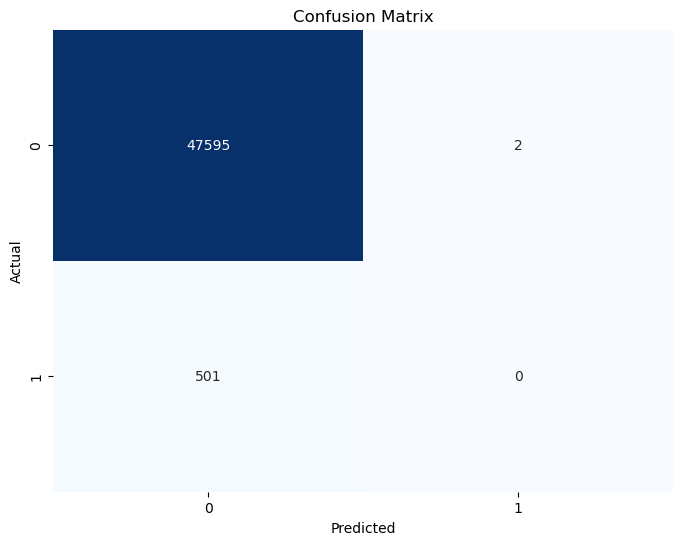

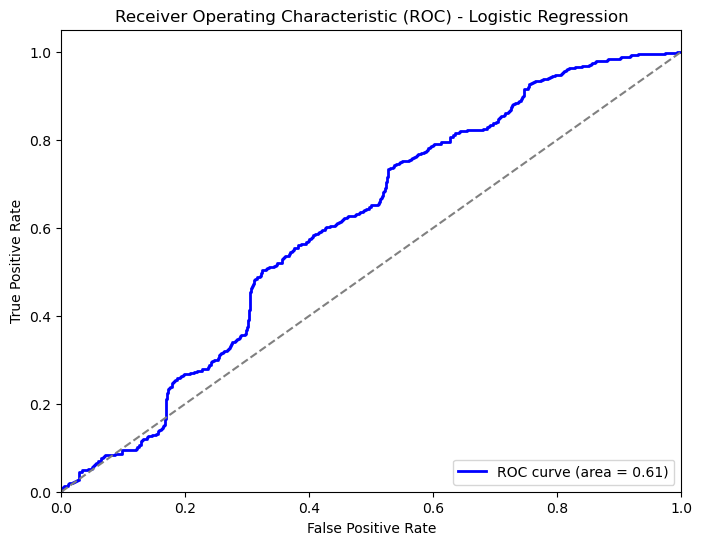

In [33]:
# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg_model.predict(X_test)
y_prob = logreg_model.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = auc(fpr, tpr)
print("AUC Score:", auc_score)

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

## 2. K-Nearest Neighbors (KNN) classifier

Accuracy: 0.989521393820949
AUC Score: 0.5266545716055754


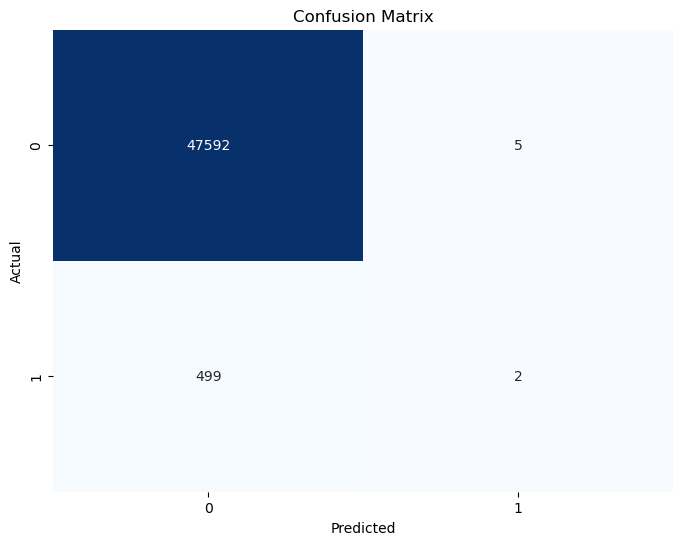

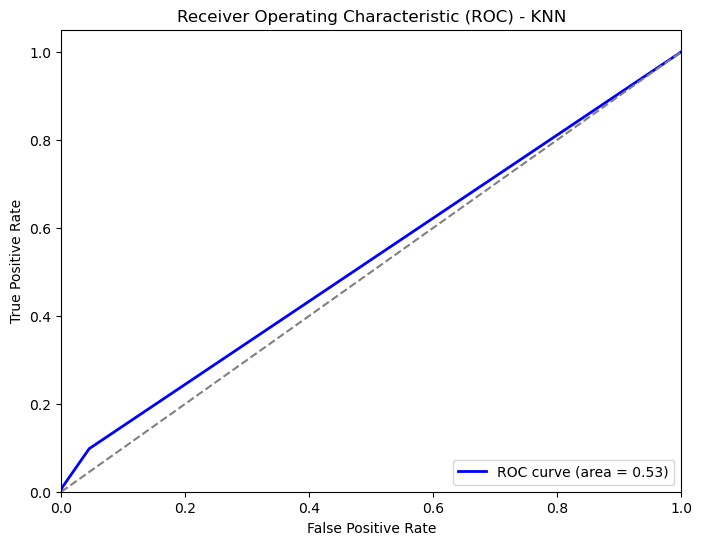

In [34]:
# Initialize and train the K-Nearest Neighbors model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_model.predict(X_test)
y_prob = knn_model.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = auc(fpr, tpr)
print("AUC Score:", auc_score)

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - KNN')
plt.legend(loc="lower right")
plt.show()


## 3. Naive Bayes Classifier model

Accuracy: 0.9887313401804649
AUC Score: 0.4854699492332016


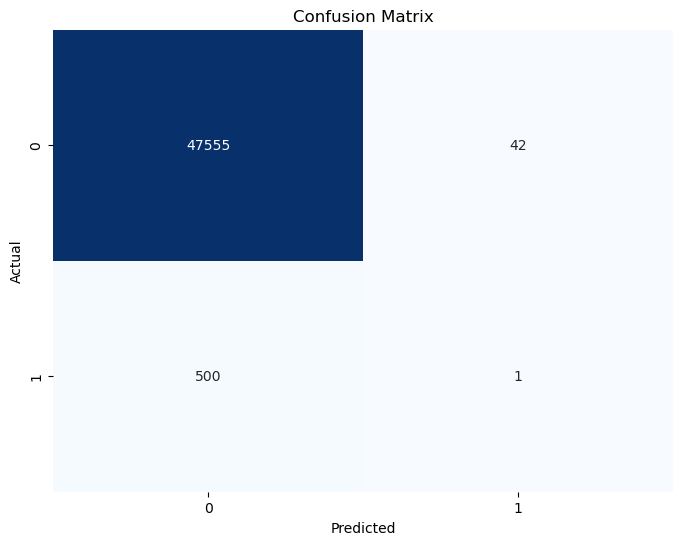

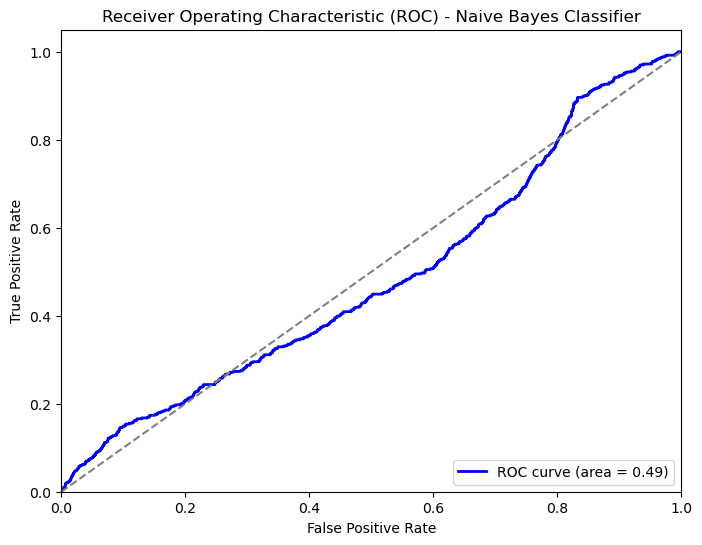

In [35]:
# Initialize and train the Naive Bayes Classifier model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = nb_model.predict(X_test)
y_prob = nb_model.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = auc(fpr, tpr)
print("AUC Score:", auc_score)

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Naive Bayes Classifier')
plt.legend(loc="lower right")
plt.show()


### Best model

Based on the provided accuracy and AUC score for each model, the **Logistic Regression model** appears to be the best choice

## 4. Lasso Regression model

Mean Squared Error (MSE): 0.010299025153042955
Root Mean Squared Error (RMSE): 0.10148411281103538
R-squared (R²) Score: 0.0008450400462450824


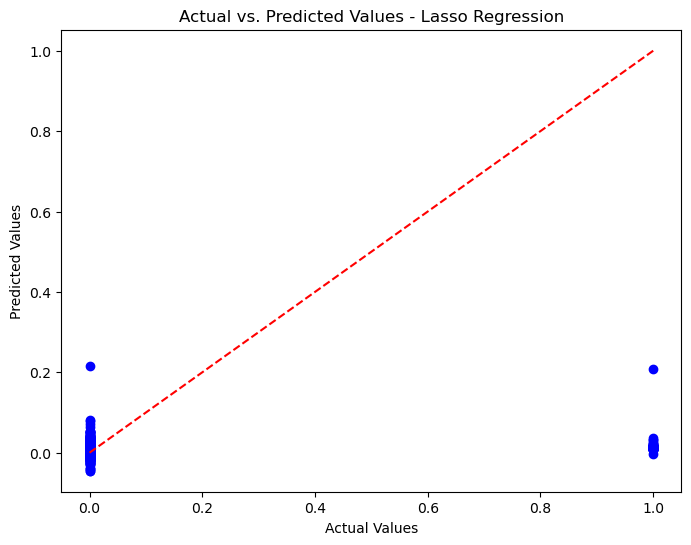

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Lasso Regression model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lasso_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_lasso = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse_lasso)

# Calculate Root Mean Squared Error (RMSE)
rmse_lasso = np.sqrt(mse_lasso)
print("Root Mean Squared Error (RMSE):", rmse_lasso)

# Calculate R-squared (R²) Score
r2_lasso = r2_score(y_test, y_pred)
print("R-squared (R²) Score:", r2_lasso)

# Plot Actual vs. Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - Lasso Regression')
plt.show()


## 5. ElasticNet Regression - Comments

Mean Squared Error (MSE): 0.01029899646844089
Root Mean Squared Error (RMSE): 0.10148397148535768
R-squared (R²) Score: 0.0008478228690851353


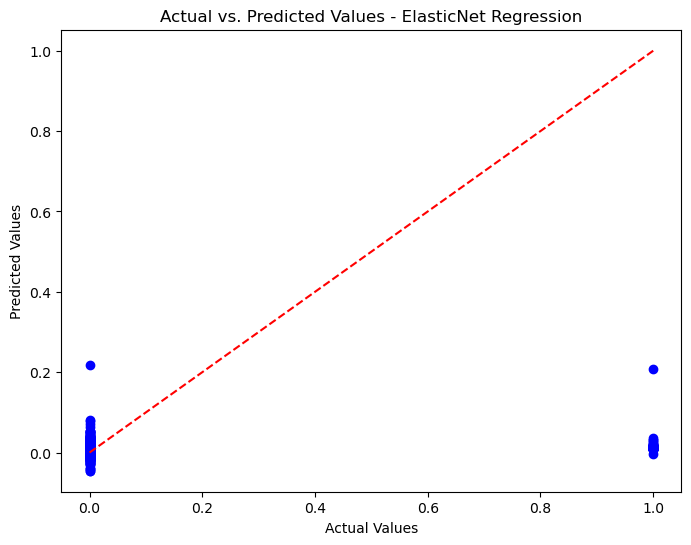

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the ElasticNet Regression model
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = elasticnet_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_elasticnet = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse_elasticnet)

# Calculate Root Mean Squared Error (RMSE)
rmse_elasticnet = np.sqrt(mse_elasticnet)
print("Root Mean Squared Error (RMSE):", rmse_elasticnet)

# Calculate R-squared (R²) Score
r2_elasticnet = r2_score(y_test, y_pred)
print("R-squared (R²) Score:", r2_elasticnet)

# Plot Actual vs. Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - ElasticNet Regression')
plt.show()


### Best Model

In [38]:
# Assuming MSE, RMSE, and R-squared scores are stored in variables mse_lasso, rmse_lasso, r2_lasso, mse_elasticnet, rmse_elasticnet, r2_elasticnet

# Select the best model based on provided metrics
if mse_lasso < mse_elasticnet:
    best_model = "Lasso Regression"
elif mse_lasso > mse_elasticnet:
    best_model = "ElasticNet Regression"
else:  # If both MSE are equal, compare RMSE
    if rmse_lasso < rmse_elasticnet:
        best_model = "Lasso Regression"
    elif rmse_lasso > rmse_elasticnet:
        best_model = "ElasticNet Regression"
    else:  # If both RMSE are equal, compare R-squared
        if r2_lasso > r2_elasticnet:
            best_model = "Lasso Regression"
        elif r2_lasso < r2_elasticnet:
            best_model = "ElasticNet Regression"
        else:  # If all metrics are equal, select either model
            best_model = "Both models have identical performance"

print("Best Model:", best_model)


Best Model: ElasticNet Regression


Since the differences in MSE, RMSE, and R² score between the two models are very small, it might be challenging to conclusively determine which model is the best solely based on these metrics. However, if you prefer a slightly higher R-squared (R²) score, **ElasticNet Regression** could be considered the better choice.

**To predict whether the comments for a particular trending YouTube video are enabled or disabled** based on the input features (number of views, likes, dislikes, comment count, and comment section status)

In [39]:
# Select relevant columns and drop rows with missing values
selected_columns = ['view_count', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled']
data = data[selected_columns].dropna()

In [40]:
# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['comments_disabled'])
y = data['comments_disabled']

#### USING trained Logistic Regression model

In [41]:
# Initialize and train the SVM model
logreg_model = LogisticRegression()
logreg_model.fit(X, y)

LogisticRegression()

In [42]:
# Function to predict ratings_disabled
def predict_comments_disabled(views, likes, dislikes, comment_count, ratings_disabled):
    # Prepare input features as a DataFrame
    input_features = pd.DataFrame({
        'view_count': [views],
        'likes': [likes],
        'dislikes': [dislikes],
        'comment_count': [comment_count],
        'ratings_disabled':  [int(ratings_disabled)]  # Convert boolean to integer
    })
    
    # Use the trained logistic regression model to predict
    prediction = logreg_model.predict(input_features)
    
    # Map prediction (0 or 1) to 'ratings_disabled' or 'ratings_enabled'
    return "comments_disabled" if prediction[0] == 1 else "comments_enabled"

In [43]:
# Example usage:
views = 23564512  # Example number of views
likes = 743931   # Example number of likes
dislikes = 84162  # Example number of dislikes
comment_count = 136942  # Example number of comments
comments_disabled = False  # Example comment section status: False for enabled, True for disabled

In [44]:
# Predict ratings_disabled
prediction = predict_comments_disabled(views, likes, dislikes, comment_count, comments_disabled)

# Output prediction
print("Prediction:", prediction)

Prediction: comments_enabled
